$$
\DeclareMathOperator{\Tr}{Tr}
\newcommand{\trp}{{^\top}} % transpose
\newcommand{\trace}{\text{Trace}} % trace
\newcommand{\inv}{^{-1}}
\newcommand{\mb}{\mathbf{b}}
\newcommand{\M}{\mathbf{M}}
\newcommand{\G}{\mathbf{G}}
\newcommand{\A}{\mathbf{A}}
\newcommand{\R}{\mathbf{R}}
\renewcommand{\S}{\mathbf{S}}
\newcommand{\B}{\mathbf{B}}
\newcommand{\Q}{\mathbf{Q}}
\newcommand{\mH}{\mathbf{H}}
\newcommand{\U}{\mathbf{U}}
\newcommand{\mL}{\mathbf{L}}
\newcommand{\diag}{\mathrm{diag}}
\newcommand{\etr}{\mathrm{etr}}
\renewcommand{\H}{\mathbf{H}}
\newcommand{\vecop}{\mathrm{vec}}
\newcommand{\I}{\mathbf{I}}
\newcommand{\X}{\mathbf{X}_{ij}}
\newcommand{\Y}{\mathbf{Y}_{jk}}
\newcommand{\Z}{\mathbf{Z}_{ik}}
$$

In our generative model, we would like to estimate the density of some complicated probability density $\log P_{\theta}(X)$. This is slightly odd notation but seems standard in these papers: it says that $X$ is a random variable but $\theta$ are parameters. To do this, we will write it as follows:

$$
\log P_{\theta}(X) =  \log P_{\theta}(X,Z) - \log P_{\theta}(Z\mid X) 
$$

This is just the definition of marginal probability. Next, we add/subtract $\log Q_{\phi}(Z\mid X)$ which sums to 0: 

$$
\log P_{\theta}(X) =  \log P_{\theta}(X,Z) - \log P_{\theta}(Z\mid X) - \log Q_{\phi}(Z\mid X) + \log Q_{\phi}(Z\mid X)
$$

We take expectation of both sides. Note that this expectation has to be w.r.t. the conditional distribution $Q(Z\mid X)$ for the rest of this to work properly: 

$$
\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X) =  \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X,Z) - \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(Z\mid X) - \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X) + \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X)
$$

Since the LHS is independent of Z, that expectation just goes away. We rearrange the terms and realize we ended up with the evidence lower bound (ELBO) and a KL divergence: 

$$
\begin{align}
\log P_{\theta}(X) =&  \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X,Z) - \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X) + \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X)- \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(Z\mid X) \\
  =&  \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X,Z) - \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X) + \int_Z Q_{\phi}(Z\mid X)\log Q_{\phi}(Z\mid X)- \int_Z Q_{\phi}(Z\mid X)\log P_{\theta}(Z\mid X) \\
=&  \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X,Z) +\mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X) - \int_Z Q_{\phi}(Z\mid X)\log \frac{Q_{\phi}(Z\mid X)}{P_{\theta}(Z\mid X)} \\
=&  \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X,Z) + \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X) -\mathcal{D}_{KL}(Q_{\theta}(Z\mid X)||  P_{\phi}(Z\mid X)) 
\end{align}
$$

The ELBO is a lower bound because KL divergence is greater than equal to 0. So if we want to maximize the LHS, we can choose to either minimize the KL divergence, or maximize the ELBO.  We would rather do the former, because the KL divergence contains the posterior $P(Z\mid X)$ and if we knew how to do that, we wouldn't be going through this hassle. The nice thing is, since this holds for any $Q$ and any $Z$ we can define both distributions to be as nice as we like. So we're going to say that the likelihood $P_{\theta}(X,Z)$, prior $P_{\theta}(Z)$ and approximate posterior $Q_{\theta}(X,Z)$ are all gaussian. We pick the easiest possible marginal distribution over $Q(Z)$, an identity-covariance gaussian: 

$$
\begin{align}
P_{\theta}(X\mid Z) :=& \mathcal{N}(a(Z,\theta), b(Z,\theta)b(Z,\theta)\trp) \\
Q_{\phi}(Z\mid X):=&\mathcal{N}(f(X,\phi),g(X,\phi)g(X,\phi)^{\intercal})\\
P_{\theta}(Z) :=& \mathcal{N}(0,\mathbf{I})
\end{align}
$$

The distributions $P_{\theta}(X\mid Z)$ and $Q_{\phi}(Z\mid X)$ are parameterized by mean and covariance-square-root functions $a,b,f,g$ which we leave unspecified for now. In practice for VAEs people use the equivalent of a mean-field assumption, which means that the covariance functions will just return SDs/variances, but I'd like to write the reparameterization trick in general form. We can additionally rewrite the expression to get a second KL divergence: 

$$
\begin{align}
\log P_{\theta}(X) =& \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z) + \mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(Z) + \mathbb{E}_{Q(Z\mid X)}\log Q_{\phi}(Z\mid X)-\mathcal{D}_{KL}(Q_{\theta}(Z\mid X)||  P_{\phi}(Z\mid X)) \\
=&\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z) + \mathcal{D}_{KL}( Q_{\phi}(Z\mid X)||P_{\theta}(Z)) - \mathcal{D}_{KL}(Q_{\theta}(Z\mid X)||  P_{\phi}(Z\mid X))
\end{align}
$$

Conveniently, the KL divergence between two gaussians (the prior and approximate posterior) is analytic. What remains is the expectation $\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z)$, which we can compute from its empirical, sample-based mean: 

$$
\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z) = \int Q_{\phi}(Z\mid X)\log P_{\theta}(X|Z)d Q \approx \frac{1}{N} \sum \log P_{\theta}(X|Z) Z_i, \\\
Z_i\sim\mathcal{N}(f(X,\phi),g(X,\phi)g(X,\phi)\trp)
$$

The naive gradient estimator here has very high variance according to the VAE paper, though it is used in Blei, Jordan and Paisley 2012 (ICML):

$$
\nabla_{\phi}\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z) \approx \frac{1}{N} \sum \nabla_{\phi}\log P_{\theta}(X|Z) Z_i
$$

What the VAE paper does instead is apply the reparameterization trick:  

\begin{align}
\epsilon&\sim\mathcal{N}(0, \I)\\
Z &= f(X,\phi) + g(X,\phi)\epsilon\\
\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z)  &\approx \frac{1}{N} \sum \log P_{\theta}(X|Z)(f(X,\phi) + g(X,\phi)\epsilon)\\
\nabla_{\phi}\mathbb{E}_{Q(Z\mid X)}\log P_{\theta}(X\mid Z)  &\approx \frac{1}{N} \sum \nabla_{\phi}\log P_{\theta}(X|Z)(f(X,\phi) + g(X,\phi)\epsilon)
\end{align}

Now let's see if we can implement it using tensorflow. We begin by sanity-checking a basic MLP and then go to VAEs. First, import some things we'll need and download MNIST: 

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

global_dtype = tf.float32

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
input_size = mnist.train.images.shape[1]

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Next, define our neural network building blocks: 

In [2]:
def _dense_mlp_layer(x, input_size, out_size, nonlinearity=tf.nn.softmax, name_prefix=""):
    w_init = tf.truncated_normal(shape=[input_size, out_size], stddev=0.001)
    b_init = tf.ones(shape=[out_size]) * 0.1
    W = tf.Variable(w_init, name="%s_W" % name_prefix)
    b = tf.Variable(b_init, name="%s_b" % name_prefix)
    out = nonlinearity(tf.matmul(x, W) + b)
    return out, [W, b]

def _mlp(x, n_layers, units_per_layer, input_size, out_size, nonlinearity=tf.tanh):
    train_vars = []

    x, v = _dense_mlp_layer(x, input_size, units_per_layer, nonlinearity, name_prefix="into_hidden")
    train_vars.extend(v)

    for l in range(n_layers-1):
        x, v = _dense_mlp_layer(x, units_per_layer, units_per_layer, nonlinearity, name_prefix="hidden")
        train_vars.extend(v)

    x, v = _dense_mlp_layer(x, units_per_layer, out_size, nonlinearity, name_prefix="readout")
    train_vars.extend(v)
    return x, train_vars

Now we construct the graph. The graph and scope boilerplate makes our life easier as far as visualization and debugging is concerned: 

In [3]:
mlp_graph = tf.Graph()

with mlp_graph.as_default():
    with tf.name_scope("Feedforward_Net"):
        x = tf.placeholder(shape=[None, input_size], dtype=global_dtype, name='x')
        y = tf.placeholder(shape=[None, 10], dtype=global_dtype, name='y')
        y_hat, mlp_test_vars = _mlp(x, n_layers=2, units_per_layer=30, input_size=784, out_size=10)

    with tf.name_scope("Opt_and_loss"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))
        train_step_mlptest = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)#, var_list=mlp_test_vars)

    with tf.name_scope("Support_stuff"):
        init = tf.global_variables_initializer()
        correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_hat,1))
        mlp_acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Someone put together nice code to visualize tensorflow graphs in ipython notebooks. There is more visualization / exploration that can be done using tensorboard, which is the tool this uses. 

In [4]:
# TensorFlow Graph visualizer code
# https://stackoverflow.com/questions/41388673/visualizing-a-tensorflow-graph-in-jupyter-doesnt-work
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:800px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:800px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

We visualize our graph: 

In [5]:
show_graph(mlp_graph.as_graph_def())

Next we create a session, initialize our variables, and train the network: 

Test accuracy: 0.933300


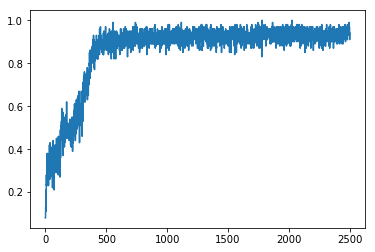

In [7]:
sess = tf.Session(graph=mlp_graph)
sess.run(init)
train_steps = 2500

acc = np.zeros(train_steps)

# create this op outside of the loop so we don't create it 5000 times
for i in range(train_steps):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    acc[i] = mlp_acc.eval(session = sess, feed_dict = {x: batch_xs, y: batch_ys})
    sess.run(train_step_mlptest, feed_dict={x: batch_xs, y: batch_ys})

test_acc = mlp_acc.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test accuracy: %f" % test_acc)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(acc)

Now we can use those blocks to construct the VAE. First, some config stuff and a helper: 

In [21]:
from tensorflow.contrib.distributions import MultivariateNormalDiag, kl

encoder_depth = 2
decoder_depth = 2
encoder_units = 100
decoder_units = 100
latent_size = 10
global_dtype = tf.float32
minibatch_size = 500
input_size = mnist.train.images.shape[1]
train_steps = mnist.train.num_examples // minibatch_size
encoder_nonlinearity = tf.nn.tanh
decoder_nonlinearity = tf.nn.tanh
n_epochs = 1

def elbo_op(x, p, q):
    prior = MultivariateNormalDiag(tf.zeros([latent_size]), tf.ones(latent_size))
    kd = kl(q, prior)
    ll = p.log_prob(x)
    return tf.reduce_mean(ll + kd)


Construct the graph: 

In [22]:
vae_graph = tf.Graph()

with vae_graph.as_default():
    with tf.name_scope("Encoder_Q"):
        x = tf.placeholder(shape=[None, input_size], dtype=global_dtype, name='x')
        q_mu, q_mu_vars = _mlp(x, n_layers=encoder_depth, units_per_layer=encoder_units, input_size=input_size, out_size=latent_size, nonlinearity=encoder_nonlinearity)
        q_logsigma, q_logsigma_vars = _mlp(x, n_layers=encoder_depth, units_per_layer=encoder_units, input_size=input_size, out_size=latent_size, nonlinearity=encoder_nonlinearity)
        q = MultivariateNormalDiag(q_mu, 1e-10 + tf.exp(q_logsigma))
        epsilon = tf.random_normal([minibatch_size, latent_size])
        z = q_mu + tf.sqrt(tf.exp(q_logsigma)) * epsilon

    with tf.name_scope("Decoder_P"):
        p_mu, p_mu_vars = _mlp(z, n_layers=decoder_depth, units_per_layer=decoder_units, input_size=latent_size,  out_size=input_size, nonlinearity=decoder_nonlinearity)
        p_logsigma, p_logsigma_vars = _mlp(z, n_layers=decoder_depth, units_per_layer=decoder_units, input_size=latent_size, out_size=input_size, nonlinearity=decoder_nonlinearity)
        p = MultivariateNormalDiag(p_mu, 1e-10 + tf.exp(p_logsigma))

    with tf.name_scope("Opt_and_loss"):
        elbo = elbo_op(x, p, q)
        minimize_op = tf.train.AdamOptimizer(0.005).minimize(-elbo)

        
    with tf.name_scope("Support_stuff"):
        init = tf.global_variables_initializer()
        

opt_vars = q_mu_vars + q_logsigma_vars + p_mu_vars + p_logsigma_vars

In [10]:
show_graph(vae_graph.as_graph_def())

Now we run and visualize: 

In [23]:
sess = tf.Session(graph=vae_graph)
sess.run(init)

elbo_log = np.zeros(n_epochs * train_steps)

for i in range(n_epochs):
    for j in range(train_steps):
        batch_xs, batch_ys = mnist.train.next_batch(minibatch_size)
        sess.run(minimize_op, feed_dict={x: batch_xs})
        elbo_log[i*train_steps + j] = elbo.eval(session=sess, feed_dict={x: batch_xs})


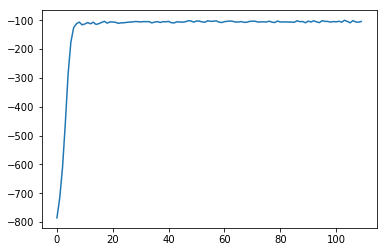

In [24]:
plt.plot(elbo_log)

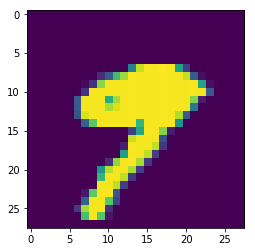

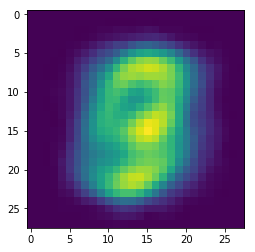

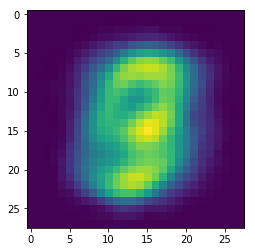

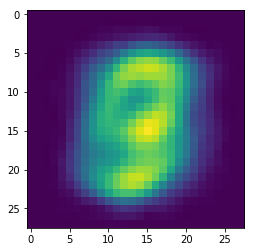

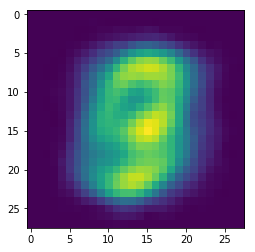

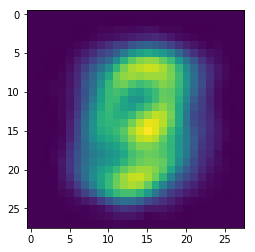

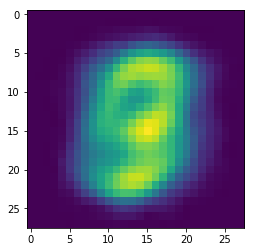

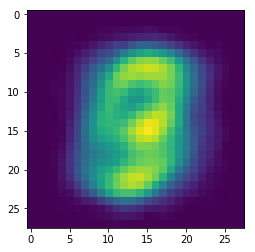

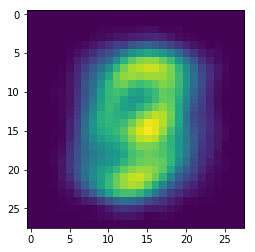

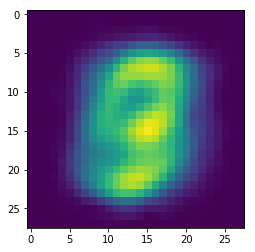

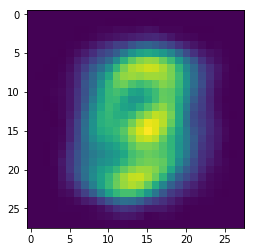

In [26]:
plt.imshow(batch_xs[0].reshape(28,28))
plt.figure()
generated_mu = p_mu.eval(session=sess, feed_dict={z: np.random.normal(size=(minibatch_size, latent_size))})
for i in range(10):
    plt.imshow(generated_mu[i].reshape(28,28))
    plt.figure()